In [133]:
import numpy as np
from numpy.linalg import inv
from numpy import linalg as LA
import proyecciones as pro
import time

# Davis_Yin

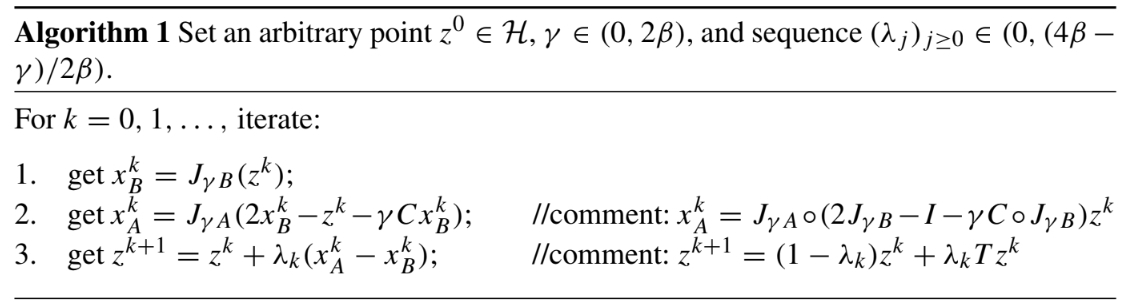

Nuestro objetivo será implementar el algoritmo de davis-yin c:

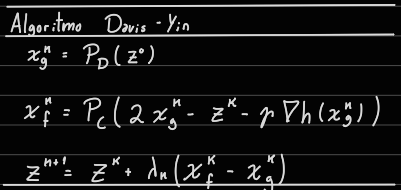

In [134]:
def Davis_Yin_iteration(z1 : np.array, z2: np.array, z3: np.array, gradient_of_h, gamma, lambda_k):
    """
        Input:
            - z1: np.array(1xN)   decision variable
            - z2: np.array(NxM) decision variable
            - z3: np.array(Mx1)   decision variable
            - gradient_of_h: function has contain the gradien of the cost function
            - lambda_k: number between 0 and (4*beta - gamma)/(2*beta) where beta is 
                        the lipschitz constan of the gradien of h.
        Output:
            - tuple np.array, np.array, np.array
        Work:
            The function ompute one iteration over the Davis_Yin_algorithm
            with prior knowledge of gamma.
    """
    
    xg_1, xg_2 = pro.P_D(z1, z2)
    xg_3 = z3
    
    grad_x1, grad_x2, grad_x3 = gradient_of_h#(xg_1, xg_2, z3)
    
    xf_1       = 2*xg_1 - z1 - gamma*grad_x1
    xf_2, xf_3 = pro.P_C(2*xg_2 - z2 - gamma*grad_x2, 2*z3   - z3 - gamma*grad_x3) 
    
    #lambda_k = some formula? 
    
    z_1 = z1 + lambda_k*(xf_1 - xg_1)
    z_2 = z2 + lambda_k*(xf_2 - xg_2)
    z_3 = z3 + lambda_k*(xf_3 - xg_3)
    
    return (xg_1, xg_2, xg_3), (xf_1, xf_2, xf_3), (z_1, z_2, z_3)

In [135]:
x1 = np.array([[1], [2], [1]])
x2 = np.array([[-1, 2, 4, 1, 5],[2, 2, 5, 2, 6],[1, 3, 6, 3, 7]])
x3 = np.array([[2, 4, 1, 6, -1]])

gradient_of_h = np.array([[1], [0.5], [1]]),\
                np.array([[1, 3, 1.5, 4, 5],[0.5, 4, 2, 4, 0],[2, 5, 1, 1, 1]]),\
                np.array([1, 0.5, 2, 2, 3])
        
gamma = 1
lambda_k = 0.1

#%timeit Davis_Yin_iteration(x1, x2, x3, gradient_of_h, gamma, lambda_k)
Davis_Yin_iteration(x1, x2, x3, gradient_of_h, gamma, lambda_k)

((array([[3.        ],
         [4.33333333],
         [4.        ]]),
  array([[-1.        ,  3.        ,  3.        ,  1.        ,  3.        ],
         [ 2.        ,  2.        ,  4.33333333,  2.        ,  4.33333333],
         [ 1.        ,  4.        ,  4.        ,  4.        ,  4.        ]]),
  array([[ 2,  4,  1,  6, -1]])),
 (array([[4.        ],
         [6.16666667],
         [6.        ]]),
  array([[-1.375     ,  2.125     ,  0.5       , -1.75      , -4.        ],
         [ 2.125     , -0.875     ,  1.66666667, -0.75      ,  2.66666667],
         [-0.375     ,  1.125     ,  1.        ,  5.25      ,  0.        ]]),
  array([[ 0.375,  2.375, -1.   ,  2.75 , -4.   ]])),
 (array([[1.1       ],
         [2.18333333],
         [1.2       ]]),
  array([[-1.0375    ,  1.9125    ,  3.75      ,  0.725     ,  4.3       ],
         [ 2.0125    ,  1.7125    ,  4.73333333,  1.725     ,  5.83333333],
         [ 0.8625    ,  2.7125    ,  5.7       ,  3.125     ,  6.6       ]]),
  array([

In [152]:
def Davis_Yin(initial_point, cost_function):#, number_iteration):
    

    z1, z2, z3 = initial_point    
    N, M = z2.shape
    
    # Notemos que para funciones lineales, el gradiente es constante
    # y su constante lipschitz puede ser cualquier valor, asi que consideremos:
    
    epsilon = 0.4
    beta = 0.7
    gamma = 0.5 # gamma in (0, 2*beta*epsilon = 1.0)
    lambda_k = 0.1 # lambda_k in (0,(4*beta - gamma)/(2*beta = 1.75))
    
    k=0
    Loss = 1000
    xg1, xg2, xg3 = np.zeros((N,1)), np.zeros((N,M)), np.zeros((1,M))
    a= "factible"
    b= "factible"
    
    while Loss >= 1e-3 and( a == "factible" or b=="factible"):
        
        (xg1_k, xg2_k, xg3_k), (xf1_k, xf2_k, xf3_k), (z1_k, z2_k, z3_k) = Davis_Yin_iteration(z1, z2, z3, cost_function, gamma, lambda_k)
        
        Loss = LA.norm(xg1_k - xg1)**2 + LA.norm(xg2_k - xg2)**2 + LA.norm(xg3_k - xg3)**2
        Loss = Loss/(LA.norm(xg1_k)**2 + LA.norm(xg2_k)**2 + LA.norm(xg3_k)**2)*100
        
        xg1, xg2, xg3 = xg1_k, xg2_k, xg3_k
        
        a= "infactible"
        b= "infactible"
        
        if (xg2_k <= xg1_k).all():
            a = "factible"
        if (xg3_k.sum(axis=0) >= xg3_k).all():
            b = "factible"

        print("D-Y :: Iteration:",k ," Loss:", Loss, "Factible:",a,b)
        
        z1, z2, z3 = z1_k, z2_k, z3_k
        k+=1
        
    return (xg1_k, xg2_k, xg3_k), (xf1_k, xf2_k, xf3_k), (z1, z2, z3)

In [153]:
N, M = 3, 5

z1_0   = np.random.randint(0,10, size=(N, 1))+0.0
z2_0   = np.random.randint(0,10, size=(N, M))+0.0
z3_0   = np.random.randint(0,10, size=(1, M))+5.0

gradient_of_h = np.random.randint(0,10, size=(N, 1))+0.0,\
                np.random.randint(0,10, size=(N, M))+0.0,\
                np.random.randint(0,10, size=(1, M))+5.0

Davis_Yin((z1_0,z2_0,z3_0), gradient_of_h)

D-Y :: Iteration: 0  Loss: 100.0 Factible: factible factible
D-Y :: Iteration: 1  Loss: 0.2672548687652354 Factible: factible factible
D-Y :: Iteration: 2  Loss: 0.6407813170453749 Factible: factible factible
D-Y :: Iteration: 3  Loss: 0.32074976874110595 Factible: factible factible
D-Y :: Iteration: 4  Loss: 0.35424551475791843 Factible: factible factible
D-Y :: Iteration: 5  Loss: 0.3925323508342478 Factible: factible factible
D-Y :: Iteration: 6  Loss: 0.4363349417736183 Factible: factible factible
D-Y :: Iteration: 7  Loss: 0.48643385029335406 Factible: factible factible
D-Y :: Iteration: 8  Loss: 0.5436193406905278 Factible: factible factible
D-Y :: Iteration: 9  Loss: 0.9397469029623575 Factible: factible factible
D-Y :: Iteration: 10  Loss: 0.9845809881419152 Factible: factible factible
D-Y :: Iteration: 11  Loss: 0.747925580164416 Factible: factible factible
D-Y :: Iteration: 12  Loss: 0.8339433099526798 Factible: infactible factible
D-Y :: Iteration: 13  Loss: 0.92504034731008

((array([[-47.90937008],
         [-45.35730009],
         [-31.40242561]]),
  array([[ -47.90937008,  -81.74538347,  -47.90937008,  -47.90937008,
           -47.90937008],
         [ -99.2218748 ,  -45.35730009, -128.71835299,  -96.28010578,
           -45.35730009],
         [ -31.40242561,  -31.40242561,  -31.40242561,  -45.03010578,
           -31.40242561]]),
  array([[-178.5281252 , -158.50461653, -208.03164701, -189.21989422,
          -124.6734832 ]])),
 (array([[-49.4662611 ],
         [-46.82601632],
         [-32.46043726]]),
  array([[ -49.46598656,  -84.23199465,  -49.4661178 ,  -49.46619433,
           -49.46662422],
         [-102.16192536,  -46.82579488, -132.66179412,  -99.26126856,
           -46.82637943],
         [ -32.46016272,  -32.46021582,  -32.46029395,  -46.51126856,
           -32.46080037]]),
  array([[-184.08807464, -163.51800535, -214.58820588, -195.23873144,
          -128.75380402]])),
 (array([[-50.50816815],
         [-47.53545549],
         [-32.4502

# ADMM

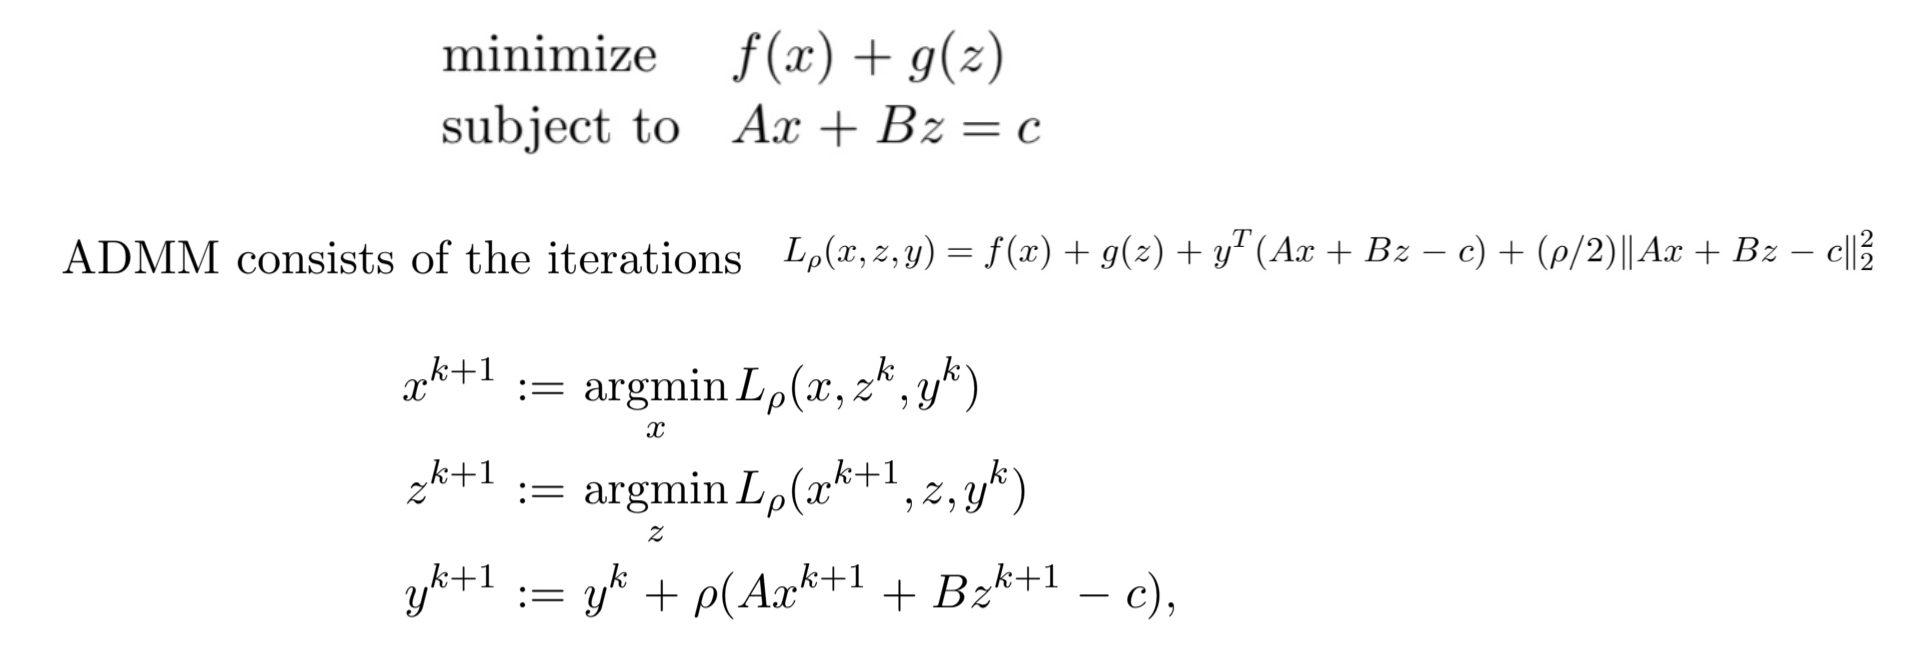

Ahora, estro objetivo será implementar el algoritmo ADMM, esto es:

In [157]:
def ADMM_iteration(decision, state, dual, phi_z1, phi_z2, phi_z3, P, s=1e-3,t=1e-3,r=1e-3):
    """
        Input:
            - decision = (x1,x2,x3): (np.array(NxM), np.array(NxM), np.array(Mx1) decision variable
            - state    = (z1, z2): (np.array(Mx1), np.array(NxM)) state variables
            - dual     = (lambda_1, lambda_2, lambda_3) (np.array(NxM), np.array(NxM), np.array(Mx1)) dual update variable
            
              Now will go the gradient of the objective functions, in this case we
              will assume there are linear, so their value is fix and a vector.
              
            - phi_z1: np.array(N) function has contain the gradient of the cost function over z1 variable 
            - phi_z2: np.array(NxM) function has contain the gradient of the cost function over z2 variable
            - phi_z3: np.array(M) function has contain the gradient of the cost function over zm3 variable
            
            - prob: np.array(M) np.array that contain the probability of each scenario
            
            - s,t,r: floats that are the augmented term of lagrangian. 1e-3 by default.
        Output:
            - tuple np.array, np.array, np.array
        Work:
            The function ompute one iteration over the Davis_Yin_algorithm
            with prior knowledge of gamma.
    """
    x1, x2, x3                   = decision
    z1, z2                       = state       #Unpackage the variables
    lambda_1, lambda_2, lambda_3 = dual
    
    N, M = x1.shape
    
    scale_factor_1 = (s+t) ** -1
    scale_factor_2 = inv(np.einsum('i,jk -> ijk', r/P, np.ones((N,N))) - t*np.identity(N))
    scale_factor_3 = P/r

    diff_1 = -0.5*(x1 - x2) + z2 - lambda_3
    diff_2 =  0.5*(x2.sum(axis=0) - x3) - z1 + lambda_1
    
    # Start algorithm
    x1_k = scale_factor_1*( -np.tile(phi_z1, (1,M)) + s*(pro.P_N(x1, P) - lambda_2) + t*(x1 + diff_1))
    x2_k = np.squeeze(scale_factor_2@((- phi_z2 - (r/P)*np.tile(-x2.sum(axis=0) + diff_2, (N,1)) - t*(x2 - diff_1) ).T)[:,:,None]).T
    x3_k = scale_factor_3*(  phi_z3 + (r/P)*(x3 + diff_2))
    
    z1_k = np.maximum( 0.5*(x2_k.sum(axis=0) - x3_k) + lambda_1 ,0)
    z2_k = np.maximum( 0.5*(x1_k - x2_k)   + lambda_3 ,0)
    
    lambda_1_k = lambda_1 + 0.5*(x2_k.sum(axis=0) - x3_k) - z1_k
    lambda_2_k = lambda_2 + x1_k - pro.P_N(x1_k, P)
    lambda_3_k = lambda_3 - 0.5*(x2 - x1) - z2_k
    
    return (x1_k, x2_k, x3_k), (z1_k, z2_k), (lambda_1_k, lambda_2_k, lambda_3_k)

In [158]:
N, M = 3, 5

x1  = np.random.randint(0,10, size=(N, M))+0.0
x2  = np.random.randint(0,10, size=(N, M))+0.0
x3  = np.random.randint(0,10, size=(1, M))+5.0

proba  = np.random.rand(M)  
proba /= proba.sum()  

gradient_of_h = np.random.randint(0,10, size=(N, 1))+0.0,\
                np.random.randint(0,10, size=(N, M))+0.0,\
                np.random.randint(0,10, size=(1, M))+5.0
    
phi_1, phi_2, phi_3 = gradient_of_h


z1 = np.random.randint(0,10, size=(1, M))
z2 = np.random.randint(0,10, size=(N, M))

lambda_1 = np.random.randint(0,10, size=(1, M))
lambda_2 = np.random.randint(0,10, size=(N, M))
lambda_3 = np.random.randint(0,10, size=(N, M))


%timeit ADMM_iteration((x1, x2, x3), (z1, z2), (lambda_1, lambda_2, lambda_3), phi_1, phi_2, phi_3, proba)
ADMM_iteration((x1, x2, x3), (z1, z2), (lambda_1, lambda_2, lambda_3), phi_1, phi_2, phi_3, proba)

282 µs ± 42.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


((array([[-3494.85167406, -3498.35167406, -3500.60167406, -3501.35167406,
          -3493.10167406],
         [-1503.28220243, -1494.53220243, -1498.78220243, -1499.28220243,
          -1499.03220243],
         [-2504.57174837, -2496.32174837, -2498.07174837, -2498.32174837,
          -2501.07174837]]),
  array([[   96.23304346,  1534.06078532,  1716.48616682,  -561.40971034,
          -1462.29764692],
         [-2893.76695654, -1467.43921468,  2716.98616682,  2429.59028966,
           1536.70235308],
         [ 2111.23304346,  -471.43921468, -6278.01383318, -2555.90971034,
           -459.79764692]]),
  array([[3128.7080462 , 1440.86296312, 2084.91866448, 1134.80871528,
           387.38087945]])),
 (array([[0., 0., 0., 0., 0.]]),
  array([[   0.        ,    0.        ,    0.        ,    0.        ,
             0.        ],
         [ 703.24237705,    0.        ,    0.        ,    0.        ,
             0.        ],
         [   0.        ,    0.        , 1893.97104241,   37.793980

In [174]:
def ADMM(initial_point, gradient, proba):
    
    x1, x2, x3 = initial_point
    
    phi_1, phi_2, phi_3 = gradient
    
    N, M = x2.shape

    z1 = np.zeros((1, M))
    z2 = np.zeros((N, M))

    lambda_1 = np.zeros((1, M))
    lambda_2 = np.zeros((N, M))
    lambda_3 = np.zeros((N, M))
    
    s=1e3
    t=1e3
    r=1e3
    
    k=0
    Loss = 1000
    
    a= "factible"
    b= "factible"
    
    while Loss >= 1e-3 and k <500:#(a == "factible" or b=="factible"):
        
        (x1_k, x2_k, x3_k), (z1_k, z2_k), (lambda_1_k, lambda_2_k, lambda_3_k) = ADMM_iteration((x1, x2, x3), (z1, z2), (lambda_1, lambda_2, lambda_3), phi_1, phi_2, phi_3, proba, s, t, r)
        
        Loss = LA.norm(x1_k - x1)**2 + LA.norm(x2_k - x2)**2 + LA.norm(x3_k - x3)**2
        Loss = Loss/(LA.norm(x1_k)**2 + LA.norm(x2_k)**2 + LA.norm(x3_k)**2)*100
        
        a= "infactible"
        b= "infactible"
        
        if (x2_k <= x1_k).all():
            a = "factible"
        if (x2_k.sum(axis=0) >= x3_k).all():
            b = "factible"

        print("Iteration:",k ," Loss:", Loss, "Factible:",a,b)
        
        x1, x2, x3 = x1_k, x2_k, x3_k
        z1, z2 = z1_k, z2_k
        lambda_1, lambda_2, lambda_3 = lambda_1_k, lambda_2_k, lambda_3_k
        
        k+=1
        
    return (x1, x2, x3), (z1, z2), (lambda_1, lambda_2, lambda_3)

In [175]:
N, M = 3, 5

z1_0   = np.random.randint(0,10, size=(N, M))+0.0
z2_0   = np.random.randint(0,10, size=(N, M))+0.0
z3_0   = np.random.randint(0,10, size=(1, M))+0.0

proba  = np.random.rand(M)  
proba /= proba.sum()  

gradient_of_h = np.random.randint(0,10, size=(N, 1))+0.0,\
                np.random.randint(0,10, size=(N, M))+0.0,\
                np.random.randint(0,10, size=(1, M))+5.0


ADMM((z1_0,z2_0,z3_0), gradient_of_h, proba)

Iteration: 0  Loss: 36.1486883702427 Factible: factible infactible
Iteration: 1  Loss: 5.659416747893666 Factible: infactible factible
Iteration: 2  Loss: 1.6047657711329433 Factible: infactible factible
Iteration: 3  Loss: 4.418007652724476 Factible: infactible factible
Iteration: 4  Loss: 1.6011803418437651 Factible: infactible factible
Iteration: 5  Loss: 3.29139100503111 Factible: infactible factible
Iteration: 6  Loss: 2.7686428267111025 Factible: infactible infactible
Iteration: 7  Loss: 1.926612659691498 Factible: infactible factible
Iteration: 8  Loss: 4.801266131504256 Factible: infactible factible
Iteration: 9  Loss: 1.4472890547091166 Factible: infactible factible
Iteration: 10  Loss: 4.442555357742292 Factible: factible factible
Iteration: 11  Loss: 3.7687593340158845 Factible: infactible factible
Iteration: 12  Loss: 1.9784158975216075 Factible: infactible factible
Iteration: 13  Loss: 6.44888143053721 Factible: infactible factible
Iteration: 14  Loss: 1.9736887636238425 F

Iteration: 386  Loss: 52.957073120725795 Factible: infactible factible
Iteration: 387  Loss: 155.32114907188986 Factible: infactible factible
Iteration: 388  Loss: 81.72396489125684 Factible: infactible factible
Iteration: 389  Loss: 91.29401989130179 Factible: infactible factible
Iteration: 390  Loss: 132.74185029700638 Factible: infactible factible
Iteration: 391  Loss: 53.05127540324415 Factible: infactible factible
Iteration: 392  Loss: 155.18417929613756 Factible: infactible factible
Iteration: 393  Loss: 81.64384542504264 Factible: infactible factible
Iteration: 394  Loss: 91.5232206802673 Factible: infactible factible
Iteration: 395  Loss: 132.51393849251505 Factible: infactible factible
Iteration: 396  Loss: 53.15090305761928 Factible: infactible factible
Iteration: 397  Loss: 155.05084239966595 Factible: infactible factible
Iteration: 398  Loss: 81.55367102410908 Factible: infactible factible
Iteration: 399  Loss: 91.76072466448362 Factible: infactible factible
Iteration: 400 

((array([[  338.86262379,   193.66835563,  4000.70404436,  6970.10572677,
           7065.02976998],
         [ 3851.73580776,  3582.33871922,  2768.61665983, -2948.55802253,
           3153.39595958],
         [ 5393.23790301,  5399.28561505,  3029.00522452,  5153.45378827,
           -802.67034685]]),
  array([[ 1546.97233915,  5344.28445844, -6309.2682609 , -1341.06910783,
            -20.05294769],
         [-2583.24988203,  2616.29769711,  2983.43638182,  6175.33398766,
            977.55705866],
         [ 2647.01703736, -6442.89474849,  4580.35903322, -4110.86505169,
            760.56365106]]),
  array([[ 9.93458455, 11.61370773, 11.87466721,  8.73211564,  6.10073045]])),
 (array([[800.40245496, 753.03684966, 621.32624347, 357.33385625,
          855.98351579]]),
  array([[   0.        , 1884.26370455,    0.        , 1474.07670987,
          4307.21037809],
         [   0.        , 2217.17178316,   39.23259278, 2958.31172042,
             0.        ],
         [4236.45531971,  

# Briceno_Arias

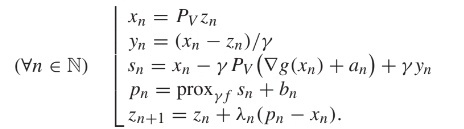

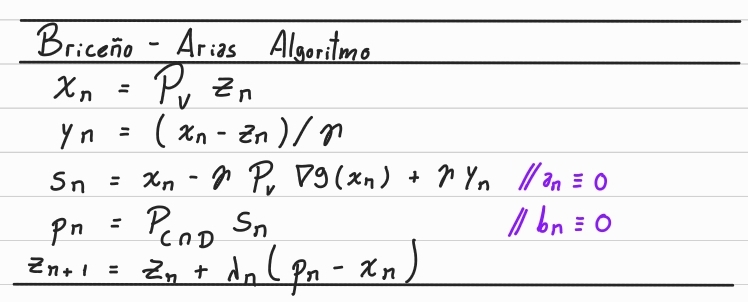

In [115]:
def Briceno_Arias_iteration(z1, z2, z2_copy, z3, gradient_of_g, P, gamma, lambdan):
    """
        Input:
            - z1: np.array(1xN)   decision variable
            - z2: np.array(NxM) decision variable
            - z3: np.array(Mx1)   decision variable
            - gradient_of_g: function has contain the gradien of the cost function
            - lambda_k: number between 0 and (4*beta - gamma)/(2*beta) where beta is 
                        the lipschitz constan of the gradien of h.
        Output:
            - tuple np.array, np.array, np.array
        Work:
            The function ompute one iteration over the Davis_Yin_algorithm
            with prior knowledge of gamma.
    """
    # Unpackage of gradient
    g1, g2, g3 = gradient_of_g
    
    # First step, xn = Pv zn
    x1, x2, x2_copy = pro.P_N1(z1, z2, z2_copy, P)
    x3 = z3
    
    # Segundo step, yn = (xn-zn)/gamma
    y1, y2, y2_copy, y3 = (x1-z1)/gamma, (x2-z2)/gamma, (x2_copy-z2_copy)/gamma, (x3-z3)/gamma
    
    # Third step, sn = xn - gamma * Pv ( gradient_of_g ) + gamma * yn
    s1_aux, s2_aux, s2_copy_aux = pro.P_N1(np.tile(g1,(1,M)), g2, g2, P)
    s1, s2, s2_copy, s3 = x1 - gamma*(s1_aux + y1), \
                          x2 - gamma*(s2_aux + y2), \
                          x2_copy - gamma*(s2_copy_aux + y2_copy), \
                          x3 - gamma*(g3 + y3)
    
    # Fourth step, pn = Pc\cap D sn
    (p1, p2),( p2_copy, p3) = pro.P_CinterD(s1, s2, s2_copy, s3)
    
    # Last step, zn+1 = zn + lambdan* (pn - xn)
    z1n, z2n, z2_copyn, z3n = z1 + lambdan * (p1 - x1), \
                              z2 + lambdan * (p2 - x2), \
                              z2_copy + lambdan * (p2_copy - x2_copy), \
                              z3 + lambdan * (p3 - x3), \
    
    return (x1, x2, x2_copy, x3), (y1, y2, y2_copy, y3), (z1n, z2n, z2_copyn, z3n)

In [116]:
N, M = 4, 5

z1_0   = np.random.randint(0,10, size=(N, M))+0.0
z2_0   = np.random.randint(0,10, size=(N, M))+0.0
z2_copy_0   = np.random.randint(0,10, size=(N, M))+0.0
z3_0   = np.random.randint(0,10, size=(1, M))+5.0

gradient_of_g = np.random.randint(0,10, size=(N, 1))+0.0,\
                np.random.randint(0,10, size=(N, M))+0.0,\
                np.random.randint(0,10, size=(1, M))+5.0


proba  = np.random.rand(M)  
proba /= proba.sum()  

%timeit Briceno_Arias_iteration(z1_0,z2_0,z2_copy_0, z3_0, gradient_of_g, proba, 1e-3, 1e-3)
Briceno_Arias_iteration(z1_0,z2_0,z2_copy_0, z3_0, gradient_of_g, proba, 1e-3, 1e-3)

193 µs ± 50 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


((array([[6.14888496, 6.14888496, 6.14888496, 6.14888496, 6.14888496],
         [1.99454761, 1.99454761, 1.99454761, 1.99454761, 1.99454761],
         [6.96454713, 6.96454713, 6.96454713, 6.96454713, 6.96454713],
         [2.47967502, 2.47967502, 2.47967502, 2.47967502, 2.47967502]]),
  array([[4.5, 1. , 2. , 1. , 3. ],
         [4.5, 4.5, 2.5, 4.5, 7.5],
         [3.5, 9. , 5. , 6.5, 3. ],
         [2.5, 6. , 0.5, 6. , 6. ]]),
  array([[4.5, 1. , 2. , 1. , 3. ],
         [4.5, 4.5, 2.5, 4.5, 7.5],
         [3.5, 9. , 5. , 6.5, 3. ],
         [2.5, 6. , 0.5, 6. , 6. ]]),
  array([[10.,  6.,  6., 14., 12.]])),
 (array([[ 5.14888496e+03,  1.48884956e+02, -2.85111504e+03,
           1.14888496e+03, -8.51115044e+02],
         [-2.00545239e+03, -5.45239278e+00, -1.00545239e+03,
          -1.00545239e+03,  1.99454761e+03],
         [ 9.64547128e+02, -2.03545287e+03,  9.64547128e+02,
          -1.03545287e+03,  5.96454713e+03],
         [ 1.47967502e+03,  2.47967502e+03, -5.20324985e+02,
    

In [131]:
def Briceno_Arias(initial_point, gradient_of_g, P, gamma=1e-3, lambdan=1e-3):

    z1, z2, z2_copy, z3 = initial_point
    
    N, M = z2.shape

    k=0
    Loss = 1000
    
    # Briceno_Arias_iteration(z1, z2, z2_copy, z3, gradient_of_g, P, gamma, lambdan):
    # (x1, x2, x2_copy, x3), (y1, y2, y2_copy, y3), (s1, s2, s2_copy, s3), (p1, p2, p2_copy, p3), (z1n, z2n, z2_copyn, z3n)
    
    x1, x2, x2_copy, x3 = np.zeros((N,M)), np.zeros((N,M)), np.zeros((N,M)), np.zeros((1,M))
    y1, y2, y2_copy, y3 = np.zeros((N,M)), np.zeros((N,M)), np.zeros((N,M)), np.zeros((1,M))
    
    while Loss >= 1e-3 and k < 500:
        
        (x1_k, x2_k, x2_copy_k, x3_k), (y1_k, y2_k, y2_copy_k, y3_k), (z1n_k, z2n_k, z2_copyn_k, z3n_k) = Briceno_Arias_iteration(z1, z2, z2_copy, z3, gradient_of_g, P, gamma, lambdan)
        
        Loss = LA.norm(x1_k - x1)**2 + LA.norm(x2_k - x2)**2 + LA.norm(x3_k - x3)**2
        Loss = Loss/(LA.norm(x1_k)**2 + LA.norm(x2_k)**2 + LA.norm(x3_k)**2)*100
        
        a= "infactible"
        b= "infactible"
        
        if (x2_k <= x1_k).all():
            a = "factible"
        if (x2_copy_k.sum(axis=0) >= x3_k).all():
            b = "factible"

        print("Iteration:",k ," Loss:", Loss, "Factible:",a,b)
        
        x1, x2, x2_copy, x3 = x1_k, x2_k, x2_copy_k, x3_k
        y1, y2, y2_copy, y3 = y1_k, y2_k, y2_copy_k, y3_k
        
        k+=1
        
    return (x1, x2, x2_copy, x3), (y1, y2, y2_copy, y3)

In [132]:
N, M = 3, 5

z1_0   = np.random.randint(0,10, size=(N, M))+0.0
z2_0   = np.random.randint(0,10, size=(N, M))+0.0
z2_copy_0   = np.random.randint(0,10, size=(N, M))+0.0
z3_0   = np.random.randint(0,10, size=(1, M))+5.0

initial_point = (z1_0, z2_0, z2_copy_0, z3_0)

gradient_of_g = np.random.randint(0,10, size=(N, 1))+0.0,\
                np.random.randint(0,10, size=(N, M))+0.0,\
                np.random.randint(0,10, size=(1, M))+5.0


proba  = np.random.rand(M)  
proba /= proba.sum()  

#%timeit Briceno_Arias_iteration(z1_0,z2_0,z2_copy_0, z3_0, gradient_of_g, proba, 1e-3, 1e-3)
Briceno_Arias(initial_point, gradient_of_g, proba)

Iteration: 0  Loss: 100.0 Factible: infactible infactible
Iteration: 1  Loss: 0.0 Factible: infactible infactible


((array([[3.06973766, 3.06973766, 3.06973766, 3.06973766, 3.06973766],
         [3.74828069, 3.74828069, 3.74828069, 3.74828069, 3.74828069],
         [2.69265613, 2.69265613, 2.69265613, 2.69265613, 2.69265613]]),
  array([[5. , 8. , 5.5, 7. , 7.5],
         [1. , 5.5, 6.5, 4. , 3.5],
         [2. , 3.5, 2. , 0. , 6. ]]),
  array([[5. , 8. , 5.5, 7. , 7.5],
         [1. , 5.5, 6.5, 4. , 3.5],
         [2. , 3.5, 2. , 0. , 6. ]]),
  array([[14.,  5., 10., 13.,  5.]])),
 (array([[-2930.26233519,  1069.73766481,    69.73766481,  -930.26233519,
           1069.73766481],
         [-5251.71930739, -3251.71930739,  -251.71930739,  2748.28069261,
          -1251.71930739],
         [ 2692.65613244, -3307.34386756, -2307.34386756,  2692.65613244,
            692.65613244]]),
  array([[-2000.,     0., -1500., -2000.,  -500.],
         [ 1000.,  1500., -1500.,  1000., -2500.],
         [-1000.,  1500., -1000.,     0.,     0.]]),
  array([[ 2000.,     0.,  1500.,  2000.,   500.],
         [-1000